# Principal Component Analysis
## High-level Explanation of PCA
## PCA Matrix Factorization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/thananhthu/anaconda3/lib/python3.11/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/Users/thananhthu/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1475: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(x))
/Users/thananhthu/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1477: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))
/Users/thananhthu/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))
/Users/thananhthu/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:758: ComplexWarning: Casting complex values to real discards the imaginary part
  posy = float(self.convert_yunits(self._y))
/Users/

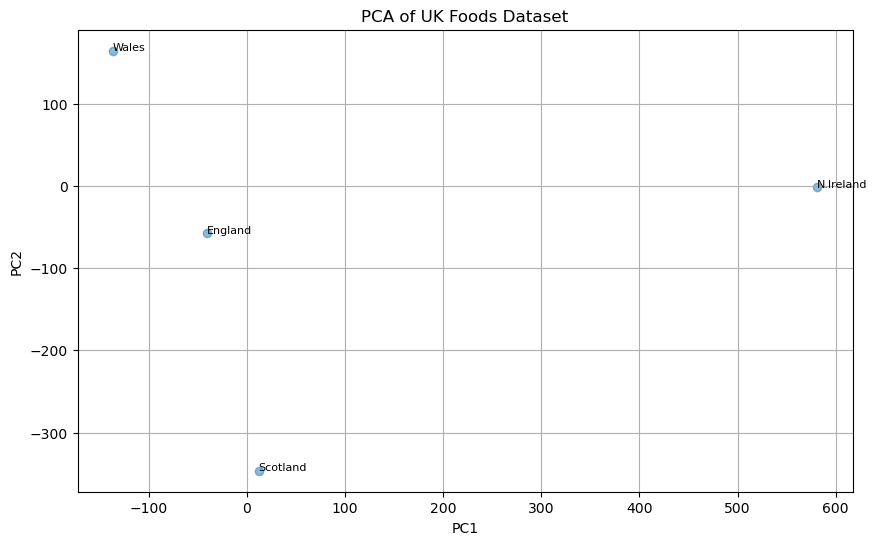

In [14]:
# Load dataset
url = "https://bioboot.github.io/bggn213_f17/class-material/UK_foods.csv"
uk_data = pd.read_csv(url, index_col=0)
uk_data # so the original dataset has 17 rows (different types of food) and 4 columns (the observations) => we need to transpose this matrix
uk_data_transpose = np.array(uk_data).T
uk_data_transpose.shape # matrix (4, 17)

# Center the data by subtracting the mean from the data matrix - this means for each x-value of each row, subtract the x-value by the mean
uk_data_mean = np.mean(uk_data_transpose)
data_centered = uk_data_transpose - uk_data_mean

# Covariance Matrix => (17, 17) matrix
cov_matrix = np.cov(data_centered.T)
cov_matrix.shape

# Compute eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

# Sort eigenvalues and corresponding eigenvectors
sorted_indices = np.argsort(eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]

# Select top 2 eigenvectors (principal components)
basis_vecs = eig_vecs[:, :2]

# Project the dataset onto the principal components
proj = data_centered @ basis_vecs  # Ensure proj is a NumPy array

# Extract the first two principal components
pc1 = proj[:, 0]
pc2 = proj[:, 1]

# Visualization of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of UK Foods Dataset")

# Annotate points with feature names
for (x, y, text) in zip(pc1, pc2, uk_data.columns.values):
    plt.annotate(text, (x, y), fontsize=8)

plt.grid()
plt.show()


In [15]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people()
lfw_people.data.shape
lfw_people.target.shape

(13233,)

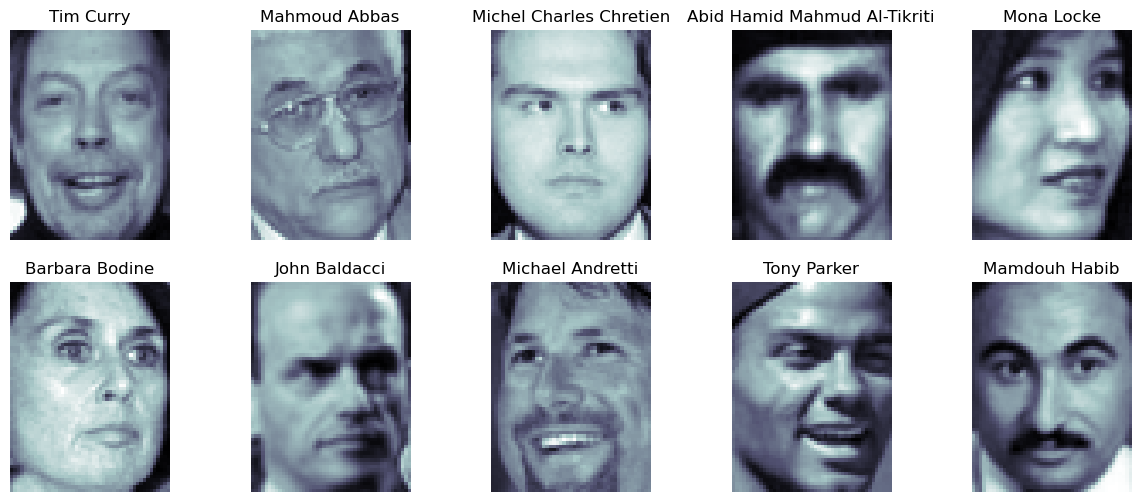

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(lfw_people.images[i], cmap='bone')
    ax.set_title(lfw_people.target_names[lfw_people.target[i]])
    ax.axis('off')